<center>МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ </center>
<center>ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ </center>
<center>«НОВОСИБИРСКИЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ»</center>
<center>Кафедра Вычислительной техники </center>
<br>
<center> <b> <font size="5">  ОТЧЁТ </font>  </b>  </center>   
<center><font size="3">по лабораторной работе №1</font></center>
<center><font size="3">по дисциплине: «Системы искусственного интеллекта и машинное обучение» </font></center>
<br>

Выполнили:
- _ _ _ Чумаков И.В _ _ _
- _ _ _ Секачёв Г.М _ _ _

Проверил: _ _ _ Осипенко И.В _ _ _

<center>  Новосибирск, 2025  </center>


# Лабораторная работа #1

## Цель работы

Получить практические навыки работы по решению задачи первичного анализа «сырых» данных, подготовки массива к обработке, выявлению и описанию зависимостей в исходных данных с использованием языка программирования Python.

## Ход работы
Ознакомиться с методическими материалами и примерами выполнения команд.
Последовательно выполнить следующие шаги применительно к выборке данных, согласно варианту задания:

1. Работа с данными

1.1. Ознакомиться вариантом задания
  - Прочитать содержимое cопровождающего файла `"*.info.txt"`
      - Определить предметную область
      - Найти информацию с описанием столбцов таблицы
  - Осмотреть файл csv в текстовом редакторе и определить:
      - Символ, используемый для разделения ячеек
      - Символ, используемый разделения дробной и целой части
      - Наличие не числовых данных (буквы алфавита)
      - Наличие штампов даты или времени

  1.2. Получить \*.csv-файл с исходными данными согласно варианту. С помощью текстового редактора определить наличие заголовка и знак-разделитель столбца

  1.3. С помощью библиотеки pandas создать таблицу (объект Dataframe) на основе \*.csv-файла с исходными данными

  1.4. Провести первичный анализ всех данных. Получить размер исходный таблицы

  1.5. Определить наличие пропусков и выбрать способ их обработки. Получить размер таблицы после обработки пропусков

  1.6. Определить наличие и привести нужные для работы признаки к числовому типу

  1.7. Сохранить в виде файла текущее состояние обработанной таблицы (Dataframe)


2. Выбор и обработка признаков

  2.1. Проверить взаимозависимость всех числовых признаков на основе матрицы корреляции

  2.2. Выбрать целевую переменную 'y' и независимые признаки 'x1, x2, x3, ...', оказывающие на нее влияние (целевая - 1 шт., признаки>=2 шт.)

  2.3. Исключить выбросы

  2.4. Сформировать обучающую и проверочную части выборки


3. Построить линейные регрессионные модели для каждой выбранной комбинации признаков :
  - m1: от ЕДИНСТВЕННОЙ переменной (x1)
  - m2: от множества НАБОРА#1 переменных (пример: x1, x2, x3)
  - m3: от множества НАБОРА#2 переменных (пример: x5, x6, x7)

4. Выполнить анализ полученных моделей:

  4.1. Получить коэффициенты линейной регрессии y(x) = K*x + B

  4.2. Получить оценку точности R2(коэфф. детерминации) и RMSE (среднеквадратичное отклонение)

  4.3. Нанести график прямой y(x) = K*x + B поверх точечной диаграммы (выбранный признак, целевая переменная)
  
  4.4. Построить диаграмму рассеяния вычисленных значений Y_pred от проверочных значений Y_test
  
  4.5. Построить гистограмму остатков (разностей между Y_pred и Y_test)
  
5. \* В качестве доп. задания предлагается расширить множество формируемых моделей.

6. Собрать итоговую информацию. Сделать обобщающие выводы по выполненной работе (см. требования к содержанию отчёта)

# Работа с данными

In [1]:
# Python 3.10
import pandas as pd
import numpy  as np

import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

## Загрузка входных данных

Информация о признаках:

1. **GameID**: Уникальный идентификатор каждой игры (целое число)
2. **LeagueIndex**: Лиги Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster и Professional, закодированные числами от 1 до 8 (порядковая шкала)
3. **Age**: Возраст каждого игрока (целое число)
4. **HoursPerWeek**: Заявленное количество часов, проведённых за игрой в неделю (целое число)
5. **TotalHours**: Заявленное общее количество часов, проведённых за игрой (целое число)
6. **APM**: Действия в минуту (непрерывная величина)
7. **SelectByHotkeys**: Количество выборов юнитов или зданий с использованием горячих клавиш за единицу времени (непрерывная величина)
8. **AssignToHotkeys**: Количество юнитов или зданий, назначенных на горячие клавиши за единицу времени (непрерывная величина)
9. **UniqueHotkeys**: Количество уникальных горячих клавиш, использованных за единицу времени (непрерывная величина)
10. **MinimapAttacks**: Количество атакующих действий на миникарте за единицу времени (непрерывная величина)
11. **MinimapRightClicks**: Количество правых кликов на миникарте за единицу времени (непрерывная величина)
12. **NumberOfPACs**: Количество PAC (групп действий) за единицу времени (непрерывная величина)
13. **GapBetweenPACs**: Средняя длительность в миллисекундах между PAC (непрерывная величина)
14. **ActionLatency**: Средняя задержка от начала PAC до первого действия в миллисекундах (непрерывная величина)
15. **ActionsInPAC**: Среднее количество действий в каждом PAC (непрерывная величина)
16. **TotalMapExplored**: Количество просмотренных игроком игровых координатных сеток 24x24 за единицу времени (непрерывная величина)
17. **WorkersMade**: Количество обученных рабочих юнитов (SCV, дроны, зонды) за единицу времени (непрерывная величина)
18. **UniqueUnitsMade**: Количество уникальных юнитов, созданных за единицу времени (непрерывная величина)
19. **ComplexUnitsMade**: Количество обученных сложных юнитов (ghosts, infestors, high templars) за единицу времени (непрерывная величина)
20. **ComplexAbilitiesUsed**: Количество использованных способностей, требующих специальных целевых инструкций, за единицу времени (непрерывная величина)

In [2]:
df = pd.read_csv(
    './datasets/SkillCraft1_Dataset_nan.csv',
    sep       = ',' ,
    decimal   = '.' ,
    header    = 0
)

df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5.0,27,10,3000,143.7180,0.003515,0.000220,7.0,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28.0,0.001397,6.0,0.0,0.000000
1,55,5.0,23,10,5000,129.2322,0.003304,0.000259,4.0,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22.0,0.001193,5.0,0.0,0.000208
2,56,4.0,30,10,200,69.9612,0.001101,0.000336,4.0,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22.0,0.000745,6.0,0.0,0.000189
3,57,3.0,19,20,400,107.6016,0.001034,0.000213,1.0,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19.0,0.000426,7.0,0.0,0.000384
4,58,***,32,10,500,122.8908,0.001136,0.000327,2.0,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15.0,0.001174,4.0,0.0,0.000019


In [3]:
df.tail()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3390,10089,8.0,?,?,?,259.6296,0.020425,0.000743,9.0,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46.0,0.000877,5.0,0.000000,0.000000
3391,10090,8.0,?,?,?,314.6700,0.028043,0.001157,10.0,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16.0,0.000788,4.0,0.000000,0.000000
3392,10092,8.0,?,?,?,299.4282,0.028341,0.000860,7.0,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19.0,0.001260,4.0,0.000000,0.000000
3393,10094,8.0,?,?,?,375.8664,0.036436,0.000594,5.0,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15.0,0.000613,6.0,0.000000,0.000631
3394,10095,8.0,?,?,?,348.3576,0.029855,0.000811,4.0,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27.0,0.001566,7.0,0.000457,0.000895


Можно заметить, что в конце присутсвуют пропуски в виде '?'. А в целевой колонке LeagueIndex присутсвует строка '***'

## Осмотр данных / Первичный анализ

### Размер таблицы

In [4]:
print  (df.shape)
nrow = df.shape[0]
ncol = df.shape[1]
print ("Итого: " + str(nrow) + " записи, " + str(ncol) + " столбец (признак).")

(3395, 20)
Итого: 3395 записи, 20 столбец (признак).


### Проверка соответствия типов данных для признаков.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3391 non-null   object 
 2   Age                   3394 non-null   object 
 3   HoursPerWeek          3393 non-null   object 
 4   TotalHours            3391 non-null   object 
 5   APM                   3392 non-null   float64
 6   SelectByHotkeys       3389 non-null   float64
 7   AssignToHotkeys       3394 non-null   float64
 8   UniqueHotkeys         3390 non-null   float64
 9   MinimapAttacks        3392 non-null   float64
 10  MinimapRightClicks    3394 non-null   float64
 11  NumberOfPACs          3393 non-null   float64
 12  GapBetweenPACs        3392 non-null   float64
 13  ActionLatency         3391 non-null   float64
 14  ActionsInPAC          3391 non-null   float64
 15  TotalMapExplored     

In [6]:
df["LeagueIndex"].unique()

array(['5.0', '4.0', '3.0', '***', '2.0', '*', '7.0', '****', '6.0',
       '1.0', nan, '8.0'], dtype=object)

In [7]:
df.groupby("LeagueIndex").count()

,GameID,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
LeagueIndex,,,,,,,,,,,,,,,,,,,
*,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
***,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
****,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.0,166,166,166,166,165,164,166,166,166,166,166,166,166,166,166,166,166,166,166
2.0,346,346,346,345,346,346,346,346,346,346,346,345,346,346,346,346,346,346,346
3.0,551,551,550,551,550,550,551,551,551,551,550,550,551,551,551,550,551,551,550
4.0,808,807,808,807,808,807,807,807,807,807,807,808,806,807,808,808,808,808,808
5.0,806,806,805,805,806,806,806,805,804,806,806,806,804,805,805,806,805,806,806
6.0,621,621,621,620,621,619,621,619,621,621,621,620,621,619,621,621,621,620,619


Можно увидеть распределение записей по рангам.
Т.к. строк "звезд" не так много, поэтому можно их просто выкинуть, но можно и предположить, что * - соотвествует 1-ому рангу и т.д.

In [8]:
stars_to_rang = {
    "*": 1.0,
    "***": 3.0,
    "****": 4.0
}

df["LeagueIndex"] = df["LeagueIndex"].replace(stars_to_rang)

Преобразуем все столбцы к числовому типу

In [9]:
columns_to_numeric = df.select_dtypes(include=['object']).columns

for col in columns_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3391 non-null   float64
 2   Age                   3339 non-null   float64
 3   HoursPerWeek          3337 non-null   float64
 4   TotalHours            3334 non-null   float64
 5   APM                   3392 non-null   float64
 6   SelectByHotkeys       3389 non-null   float64
 7   AssignToHotkeys       3394 non-null   float64
 8   UniqueHotkeys         3390 non-null   float64
 9   MinimapAttacks        3392 non-null   float64
 10  MinimapRightClicks    3394 non-null   float64
 11  NumberOfPACs          3393 non-null   float64
 12  GapBetweenPACs        3392 non-null   float64
 13  ActionLatency         3391 non-null   float64
 14  ActionsInPAC          3391 non-null   float64
 15  TotalMapExplored     

### Признаки

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GameID,3395.0,4805.012371,2719.944851,52.000000,2464.500000,4874.000000,7108.500000,10095.000000
LeagueIndex,3391.0,4.185196,1.517615,1.000000,3.000000,4.000000,5.000000,8.000000
Age,3339.0,21.649596,4.205834,16.000000,19.000000,21.000000,24.000000,44.000000
HoursPerWeek,3337.0,15.908301,11.966078,0.000000,8.000000,12.000000,20.000000,168.000000
TotalHours,3334.0,960.860228,17328.516977,3.000000,300.000000,500.000000,800.000000,1000000.000000
APM,3392.0,117.096203,51.939146,22.059600,79.995000,108.038100,142.793550,389.831400
SelectByHotkeys,3389.0,0.004303,0.005288,0.000000,0.001258,0.002500,0.005139,0.043088
AssignToHotkeys,3394.0,0.000374,0.000225,0.000000,0.000204,0.000353,0.000499,0.001752
UniqueHotkeys,3390.0,4.364012,2.361340,0.000000,3.000000,4.000000,6.000000,10.000000
MinimapAttacks,3392.0,0.000098,0.000166,0.000000,0.000000,0.000040,0.000119,0.003019


In [12]:
print ("Итого: " + str(df.shape[0]) + " записи, " + str(df.shape[1]) + " столбец (признак).")

Итого: 3395 записи, 20 столбец (признак).


## Пропущенные значения

In [13]:
df[-3:]

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3392,10092,8.0,NaN,NaN,NaN,299.4282,0.028341,0.000860,7.0,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19.0,0.001260,4.0,0.000000,0.000000
3393,10094,8.0,NaN,NaN,NaN,375.8664,0.036436,0.000594,5.0,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15.0,0.000613,6.0,0.000000,0.000631
3394,10095,8.0,NaN,NaN,NaN,348.3576,0.029855,0.000811,4.0,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27.0,0.001566,7.0,0.000457,0.000895


In [14]:
df.isna().sum()

GameID                   0
LeagueIndex              4
Age                     56
HoursPerWeek            58
TotalHours              61
APM                      3
SelectByHotkeys          6
AssignToHotkeys          1
UniqueHotkeys            5
MinimapAttacks           3
MinimapRightClicks       1
NumberOfPACs             2
GapBetweenPACs           3
ActionLatency            4
ActionsInPAC             4
TotalMapExplored         1
WorkersMade              1
UniqueUnitsMade          1
ComplexUnitsMade         1
ComplexAbilitiesUsed     3
dtype: int64

Пропусков не так много, поэтому просто выкинем записи, которые содержат NaN

In [15]:
df = df.dropna(axis='index', how='any')
print("Размер таблицы после исключения пропусков", df.shape)

Размер таблицы после исключения пропусков (3289, 20)


In [16]:
df.isna().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

In [17]:
print ("Итого: " + str(df.shape[0]) + " записи, " + str(df.shape[1]) + " столбец (признак).")

Итого: 3289 записи, 20 столбец (признак).


Теперь мы получили dataframe без пропусков, содержащий только числовые значения

## Корреляция

In [18]:
corr_df = df.corr(method='pearson')
corr_df

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
GameID,1.000000,0.026143,0.087612,-0.023998,0.004085,0.076620,0.072950,0.065455,0.078196,0.022905,0.012023,0.035375,-0.067376,-0.042363,0.037485,0.031801,-0.011275,0.029536,-0.018828,-0.001300
LeagueIndex,0.026143,1.000000,-0.125203,0.218359,0.023930,0.624320,0.429427,0.488251,0.322591,0.271771,0.204426,0.588283,-0.538305,-0.660138,0.144343,0.228396,0.307361,0.150811,0.173086,0.161284
Age,0.087612,-0.125203,1.000000,-0.187371,-0.016731,-0.209477,-0.130193,-0.101386,0.017343,0.042383,-0.018231,-0.196905,0.113440,0.239376,-0.046745,-0.021389,-0.095078,0.023584,-0.079343,-0.066689
HoursPerWeek,-0.023998,0.218359,-0.187371,1.000000,0.024219,0.245636,0.203597,0.158637,0.069030,0.084940,0.049802,0.175956,-0.135641,-0.190410,0.094740,0.066091,0.049146,0.039753,0.058162,0.072088
TotalHours,0.004085,0.023930,-0.016731,0.024219,1.000000,0.073219,0.082253,0.042706,0.009283,0.000808,0.007761,0.039748,-0.020714,-0.035840,0.010881,0.020655,0.015033,-0.002396,-0.007255,-0.006551
APM,0.076620,0.624320,-0.209477,0.245636,0.073219,1.000000,0.815408,0.535001,0.335329,0.218876,0.305033,0.636480,-0.571427,-0.724069,0.405471,0.240320,0.374754,0.127027,0.162313,0.140701
SelectByHotkeys,0.072950,0.429427,-0.130193,0.203597,0.082253,0.815408,1.000000,0.451926,0.275513,0.132516,0.106770,0.361778,-0.278251,-0.393399,0.169366,0.098940,0.156037,0.033035,0.066928,0.066381
AssignToHotkeys,0.065455,0.488251,-0.101386,0.158637,0.042706,0.535001,0.451926,1.000000,0.404171,0.207205,0.155540,0.455415,-0.380454,-0.463068,0.093337,0.201868,0.196193,0.148666,0.174075,0.174601
UniqueHotkeys,0.078196,0.322591,0.017343,0.069030,0.009283,0.335329,0.275513,0.404171,1.000000,0.156792,0.124881,0.353296,-0.223160,-0.302810,-0.023297,0.271771,0.109884,0.237872,0.123772,0.108382
MinimapAttacks,0.022905,0.271771,0.042383,0.084940,0.000808,0.218876,0.132516,0.207205,0.156792,1.000000,0.227902,0.138779,-0.215164,-0.173324,0.135434,0.166206,0.082933,0.126660,0.052228,0.042638


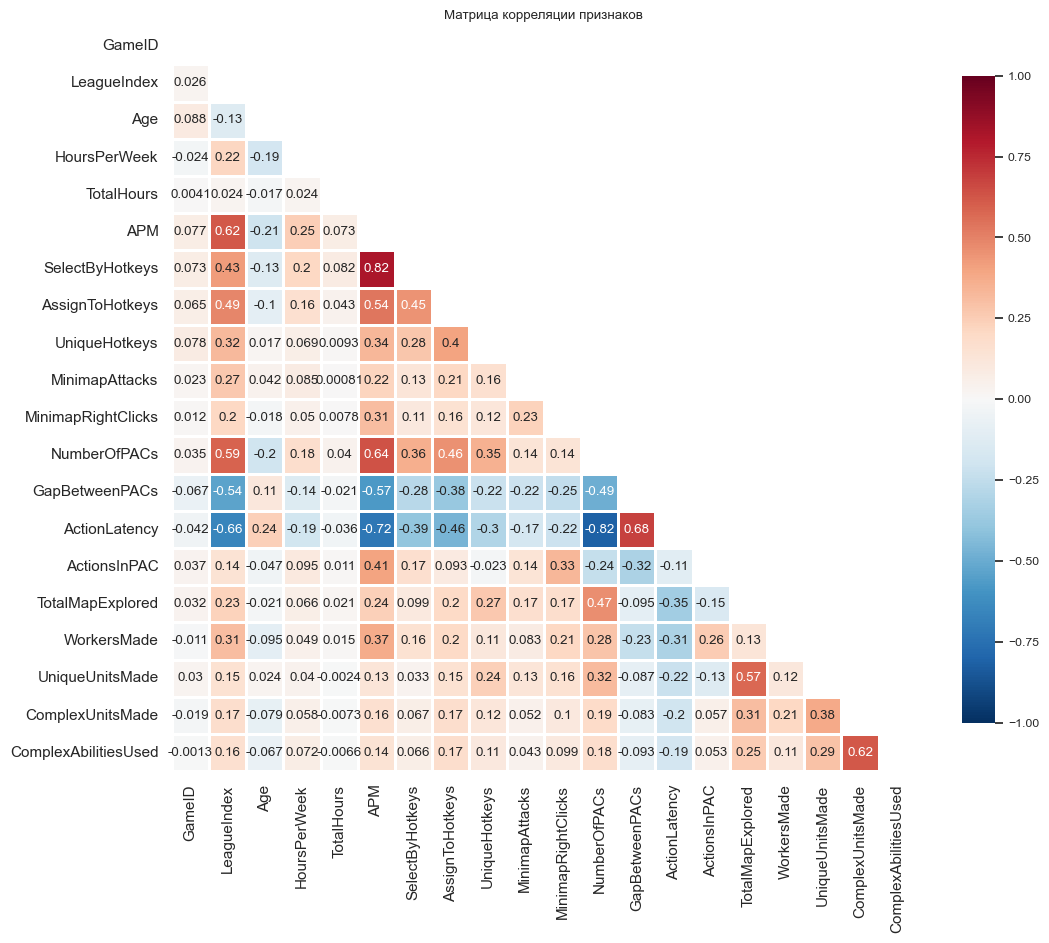

In [19]:
import matplotlib.pyplot as plt
sns.set(style="white")

mask = np.zeros_like(corr_df, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=0.8)

sns.heatmap(
            data=corr_df,
            vmin=-1, vmax=1, center=0,
            annot=True,
            cmap = 'RdBu_r',
            mask=mask,
            square=True,
            linewidths=1.0,
            cbar_kws={"shrink": .7} 
           )
plt.title(u'Матрица корреляции признаков');


Получим столбец для целевого признака.

In [20]:
corr_df["LeagueIndex"].sort_values(ascending=False)

LeagueIndex             1.000000
APM                     0.624320
NumberOfPACs            0.588283
AssignToHotkeys         0.488251
SelectByHotkeys         0.429427
UniqueHotkeys           0.322591
WorkersMade             0.307361
MinimapAttacks          0.271771
TotalMapExplored        0.228396
HoursPerWeek            0.218359
MinimapRightClicks      0.204426
ComplexUnitsMade        0.173086
ComplexAbilitiesUsed    0.161284
UniqueUnitsMade         0.150811
ActionsInPAC            0.144343
GameID                  0.026143
TotalHours              0.023930
Age                    -0.125203
GapBetweenPACs         -0.538305
ActionLatency          -0.660138
Name: LeagueIndex, dtype: float64

In [21]:
corr_df[['LeagueIndex']].abs().sort_values(by="LeagueIndex")

,LeagueIndex
TotalHours,0.023930
GameID,0.026143
Age,0.125203
ActionsInPAC,0.144343
UniqueUnitsMade,0.150811
ComplexAbilitiesUsed,0.161284
ComplexUnitsMade,0.173086
MinimapRightClicks,0.204426
HoursPerWeek,0.218359
TotalMapExplored,0.228396


Отберем 6 признаков, которые не сильно коррелируют между собой и коррелируют с целевой переменной. 

In [22]:
features = ['ActionLatency', 'APM', 'NumberOfPACs',  'AssignToHotkeys', 'SelectByHotkeys', 'UniqueHotkeys']
target   = ['LeagueIndex']

# Просмотр характеристик выбранных признаков

<Figure size 700x700 with 0 Axes>

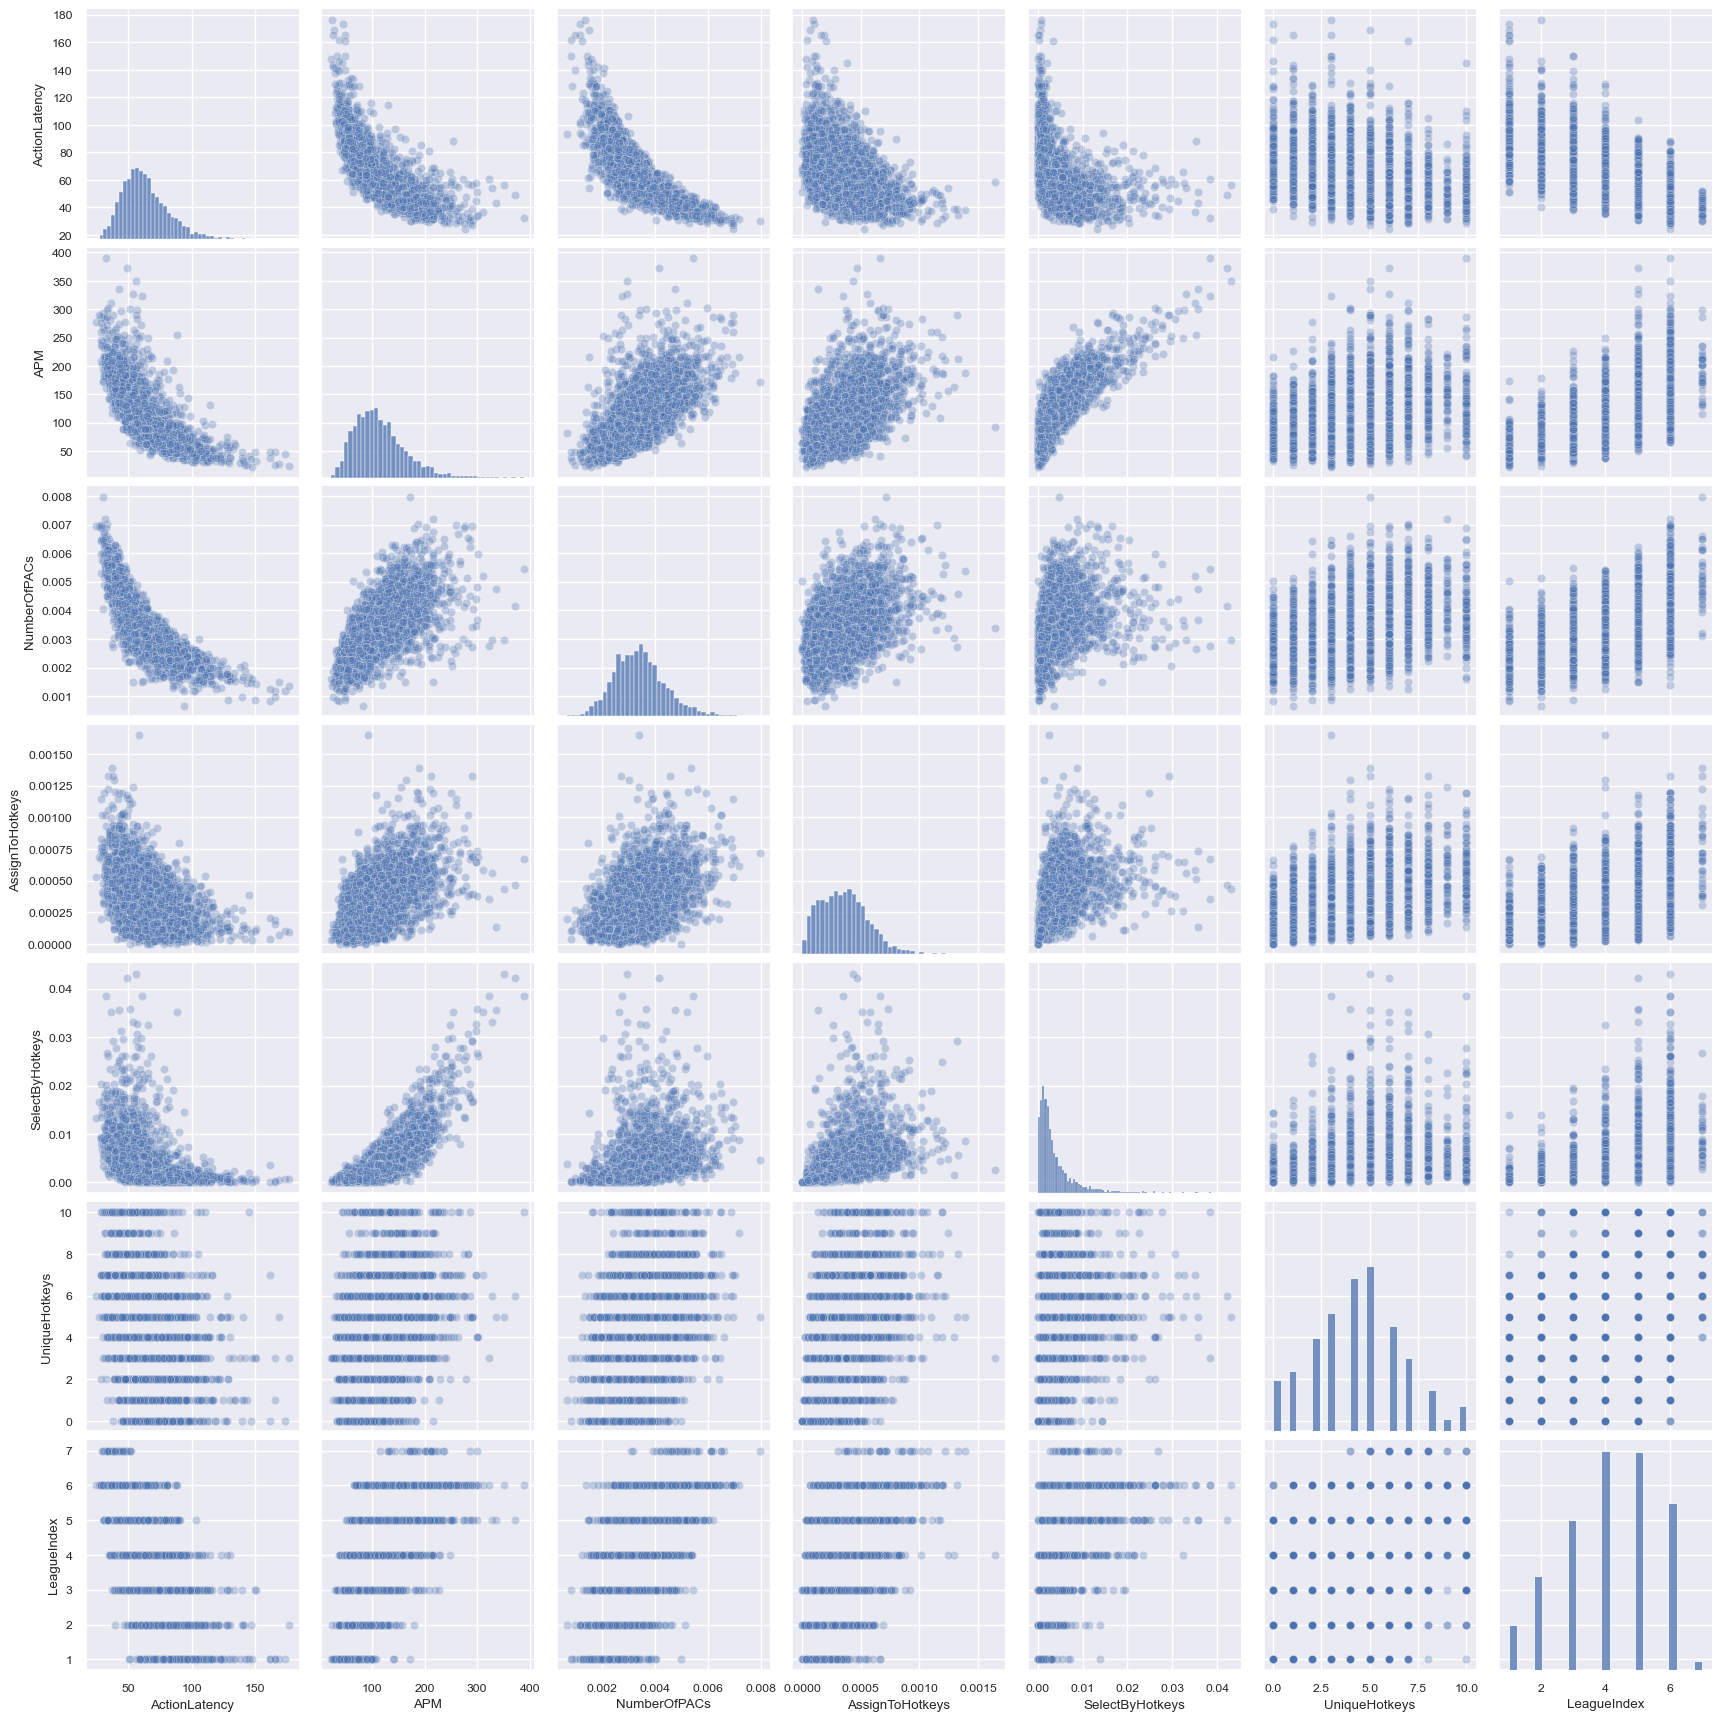

In [23]:
# График признаков попарно
plt.figure(figsize=(7,7))
%config InlineBackend.figure_format = 'png' # формат изображений PNG, для сокращения времени отрисовки графиков

sns.pairplot(
    df[features + target],
    #hue = 'Type',         # Признак разделения
    kind="scatter",        # Тип даграмм: reg,scatter
    diag_kind = 'hist',     # Тип диагоральных даграмм: hist, kde
    plot_kws={'alpha':0.3} # прозрачность точек
);

## Поиск и обработка выбросов

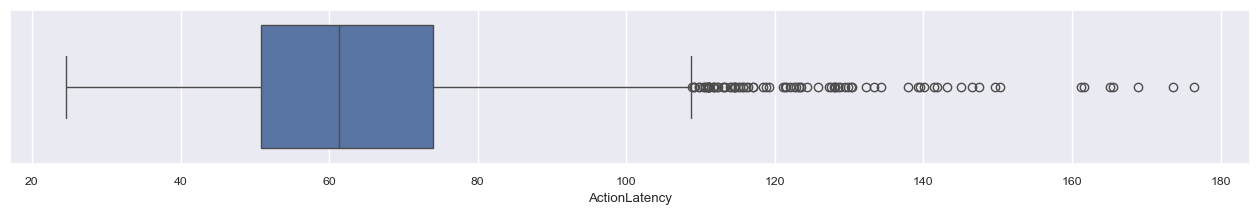

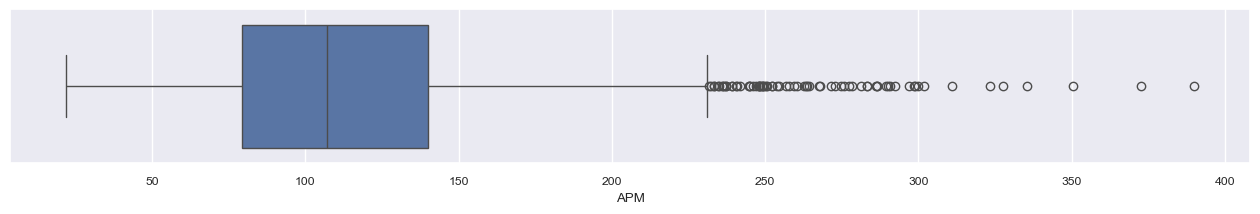

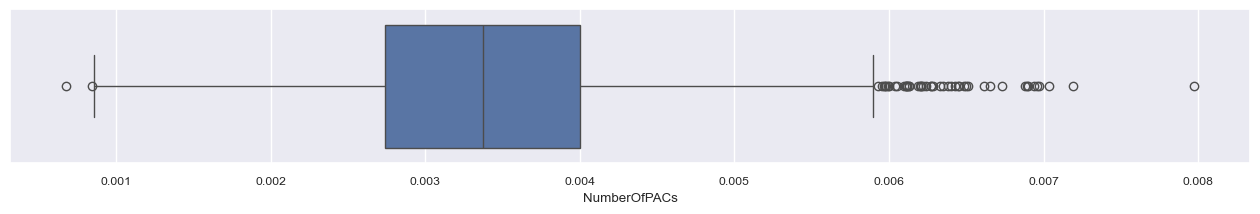

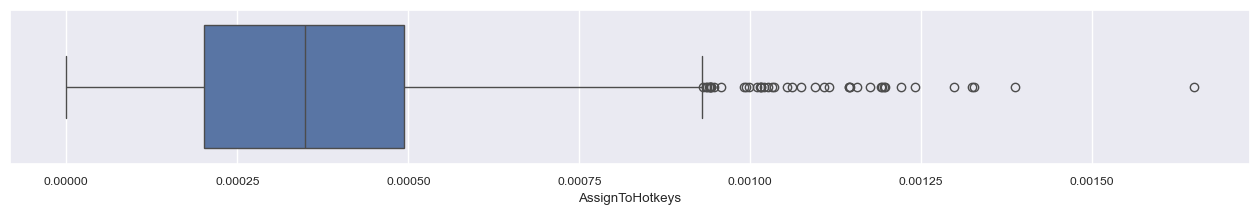

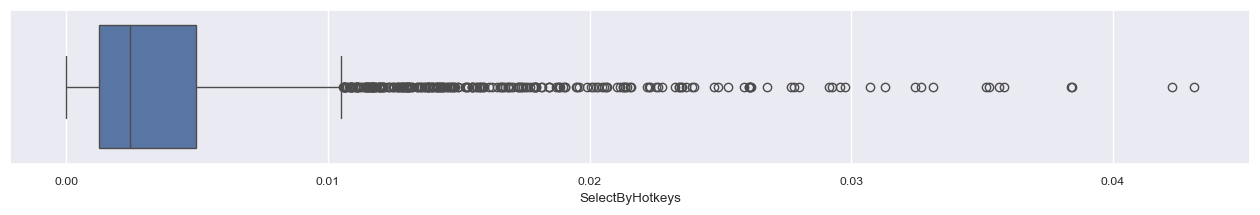

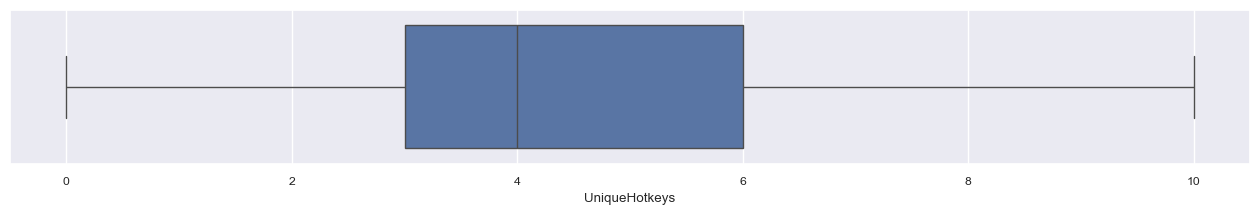

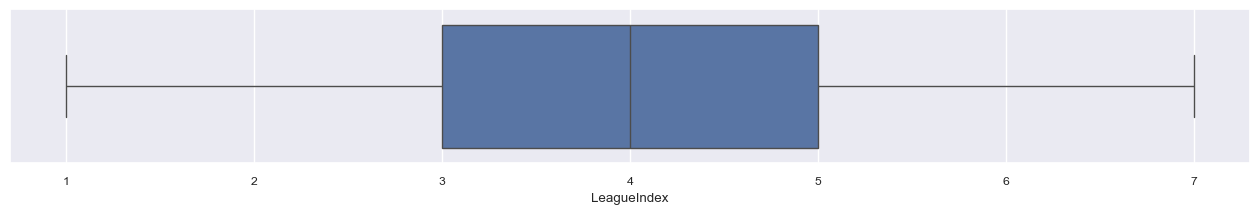

In [24]:
# Цикл: для каждого элемента в объединенном списке
for feature_name in (features+target):

    # Построить полотно для рисования с указанным размером
    plt.figure(figsize=(16,2))

    # На созданном полотне отрисовать boxplot
    sns.boxplot( data=df[feature_name], # данные
                 orient='h' # ориентация графика
               )

По ящику с усами видно, что у некоторых признаков присутвует много выбросов

In [25]:
tressholdDict = {}

for feature in features:
    f25 = df[feature].quantile(0.25)
    f75 = df[feature].quantile(0.75)
    iqr = f75 - f25
    tressholdDict[feature] = (f25 - 1.5*iqr, f75 + 1.5*iqr) 

print (tressholdDict)

{'ActionLatency': (16.114700000000006, 108.80109999999999), 'APM': (-11.928000000000011, 231.15840000000003), 'NumberOfPACs': (0.0008504151000000004, 0.005894080699999999), 'AssignToHotkeys': (-0.00023492819999999998, 0.0009297022), 'SelectByHotkeys': (-0.004309407100000001, 0.010513048900000002), 'UniqueHotkeys': (-1.5, 10.5)}


Проверим, какая часть данных выходит за пределы границ значений


In [26]:
for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0]
    tresshMax =  tressholdDict[feature_name][1]

    over_count = len(df[
                        ~((df[feature_name] >= threesMin ) & (df[feature_name] <= tresshMax)) # фильтр по двум границам. ~ инверсия логических значений
                       ]
                    )

    dcount = df[feature_name].count()

    print ('''{}. Принимаем пороговые значение равными {}.
  Кол-во эл. вне пороговых - {} из {} значение(ий) ({:.1%})\n'''.format(
        feature_name,
        tressholdDict[feature_name],
        over_count,
        dcount,
        over_count/ dcount,
    ))

ActionLatency. Принимаем пороговые значение равными (16.114700000000006, 108.80109999999999).
  Кол-во эл. вне пороговых - 84 из 3289 значение(ий) (2.6%)

APM. Принимаем пороговые значение равными (-11.928000000000011, 231.15840000000003).
  Кол-во эл. вне пороговых - 73 из 3289 значение(ий) (2.2%)

NumberOfPACs. Принимаем пороговые значение равными (0.0008504151000000004, 0.005894080699999999).
  Кол-во эл. вне пороговых - 49 из 3289 значение(ий) (1.5%)

AssignToHotkeys. Принимаем пороговые значение равными (-0.00023492819999999998, 0.0009297022).
  Кол-во эл. вне пороговых - 43 из 3289 значение(ий) (1.3%)

SelectByHotkeys. Принимаем пороговые значение равными (-0.004309407100000001, 0.010513048900000002).
  Кол-во эл. вне пороговых - 256 из 3289 значение(ий) (7.8%)

UniqueHotkeys. Принимаем пороговые значение равными (-1.5, 10.5).
  Кол-во эл. вне пороговых - 0 из 3289 значение(ий) (0.0%)



Отфильтруем значения которые находятся вне пороговых.

In [27]:
df_Filtred = df.copy()

for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0]
    tresshMax =  tressholdDict[feature_name][1]

    df_Filtred = df_Filtred[
        (df_Filtred[feature_name] >= threesMin ) & (df_Filtred[feature_name] <= tresshMax)
        ]
    print("Обработан ", feature_name )


print ("Отброшено {} строк. Осталось {} строк.".format(
    len(df)  - len(df_Filtred),
    len(df_Filtred))
)

Обработан  ActionLatency
Обработан  APM
Обработан  NumberOfPACs
Обработан  AssignToHotkeys
Обработан  SelectByHotkeys
Обработан  UniqueHotkeys
Отброшено 396 строк. Осталось 2893 строк.


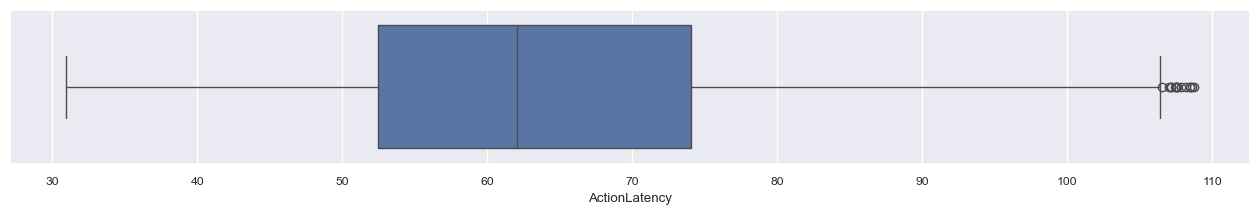

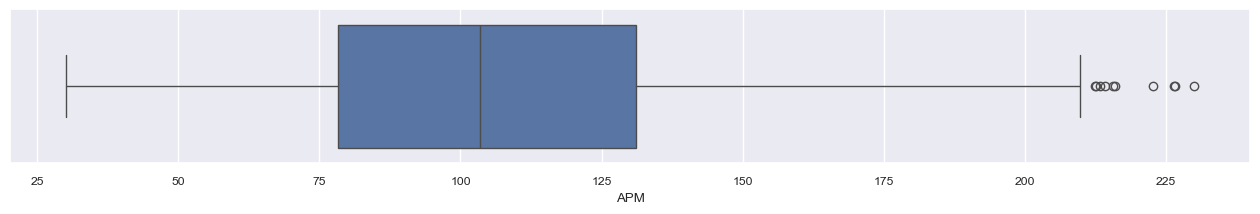

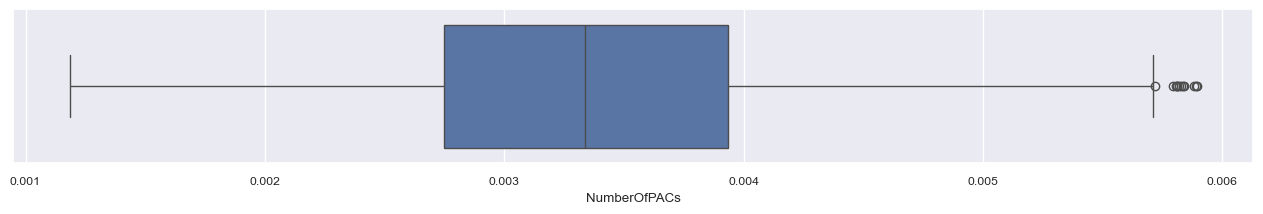

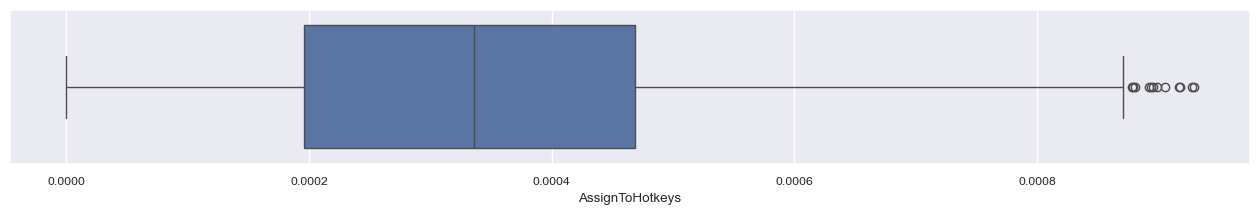

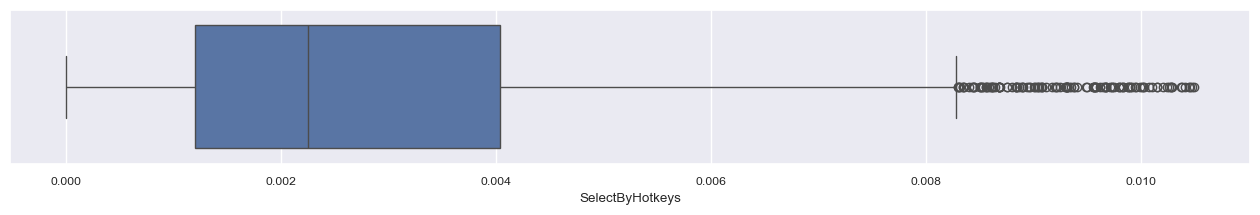

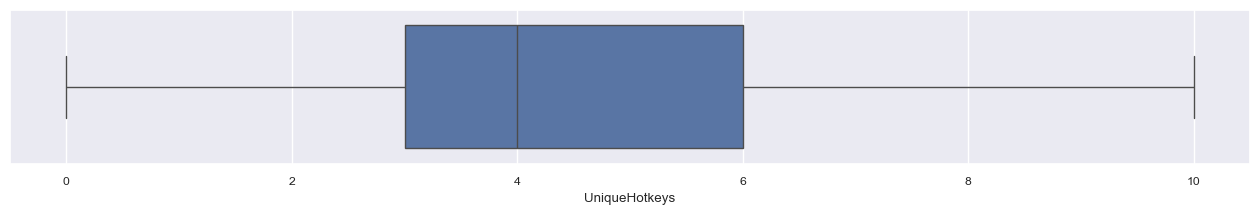

In [28]:
for feature_name in features:

    plt.figure(figsize=(16,2))

    sns.boxplot( data = df_Filtred[feature_name],
                 orient='h'
               )

ActionLatency 30.9585 108.72
APM 30.1632 229.9122
NumberOfPACs 0.0011841781 0.0058936005
AssignToHotkeys 0.0 0.0009292009
SelectByHotkeys 0.0 0.0104873692
UniqueHotkeys 0.0 10.0
LeagueIndex 1.0 7.0


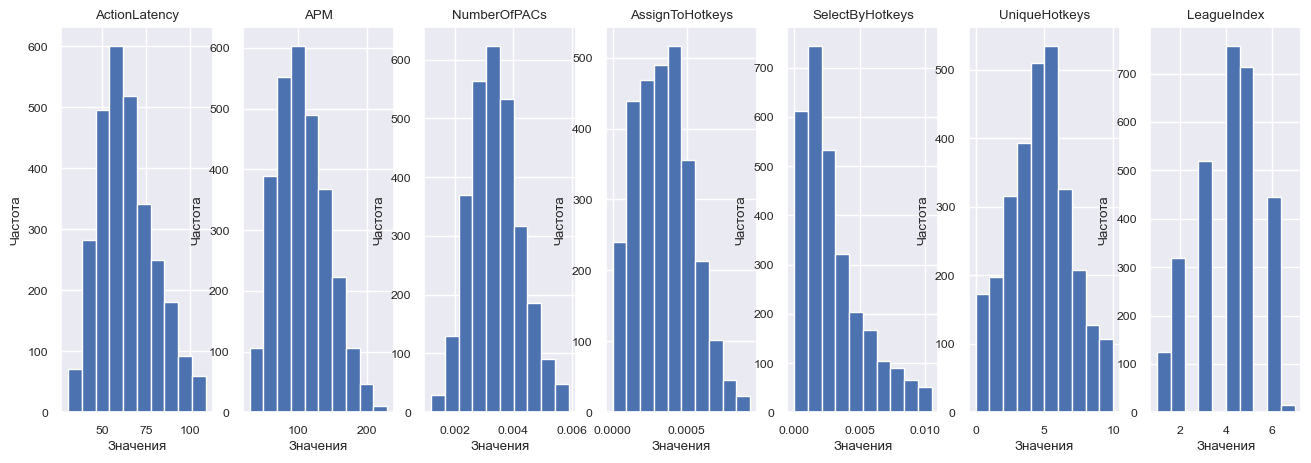

In [29]:
plt.figure(figsize=(16, 5))
plot_number = 0

for feature_name in (features+target):
    plot_number += 1

    plt.subplot(1, len(features+target), plot_number)

    plt.hist(df_Filtred[feature_name])

    plt.title(feature_name)
    plt.xlabel(u'Значения')
    plt.ylabel(u'Частота')
    print (feature_name,
           df_Filtred[feature_name].min(),
           df_Filtred[feature_name].max())

In [ ]:
df_Filtred.to_csv('../datasets/SkillCraft1_Dataset_nan_PREPARED.csv',
            index=False,
           )

## Формирование тренировочной и проверочной выборок

In [35]:
valid_size = 0.3
rand_seed = 8

x_train, x_test, y_train, y_test =  train_test_split(
    df_Filtred[features],
    df_Filtred[target],

    test_size = valid_size,
    random_state=rand_seed,
    shuffle=True
)

In [36]:
print ("Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(y_train),
    len(x_test),  len(y_test),
    len(x_train)+len(x_test), len(y_train)+len(y_test),
))

Кол-во элементов: 
  x_train: 2025, y_train 2025 
  x_test:  868, y_test  868 
  total x: 2893, total y 2893 


# Построение модели

## Одномерная модель от признака 'ActionLatency'

In [37]:
model_ActionLatency = linear_model.LinearRegression()

In [38]:
model_ActionLatency.fit(
    x_train[['ActionLatency']],
    y_train
)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
y_predicted_on_ActionLatency = model_ActionLatency.predict(x_test[['ActionLatency']])

Для наглядности построим график рассеяния (он же график разброса, точечный, scatter) зависимой величины y от единственного определяющего признака

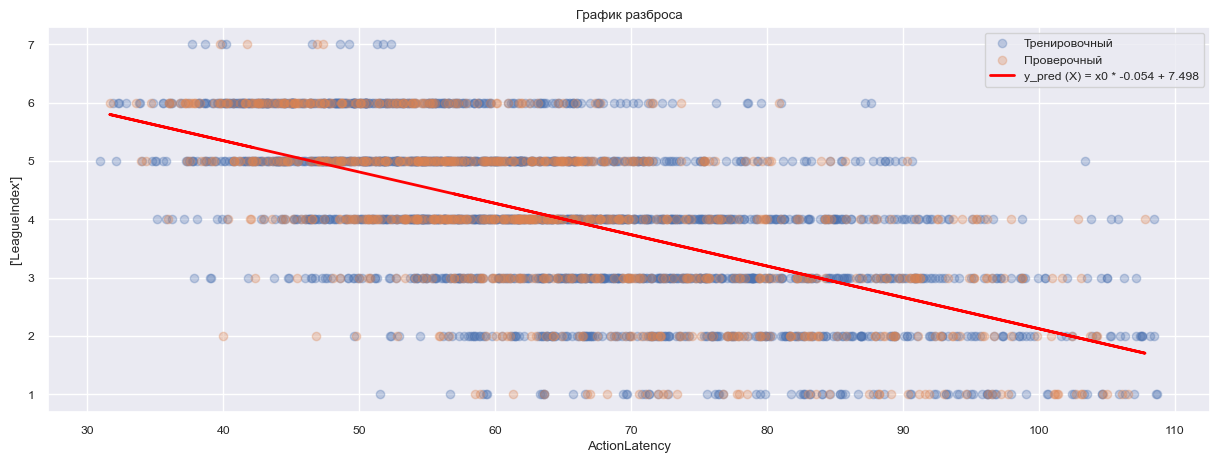

In [40]:
plt.figure(figsize=(15,5))

plt.scatter(x_train[['ActionLatency']],  y_train, alpha=0.3, label='Тренировочный') # тренировочный
plt.scatter(x_test[['ActionLatency']],   y_test,  alpha=0.3, label='Проверочный')   # проверочный


plt.plot( x_test[['ActionLatency']], y_predicted_on_ActionLatency,
          lw=2, color='red',
          label="y_pred (X) = x0 * {:.3f} + {:.3f}".format(model_ActionLatency.coef_[0][0], model_ActionLatency.intercept_[0]))
plt.grid(True)
plt.legend(loc="best")
plt.xlabel('ActionLatency')
plt.ylabel(target) 
plt.title(u'График разброса'); 

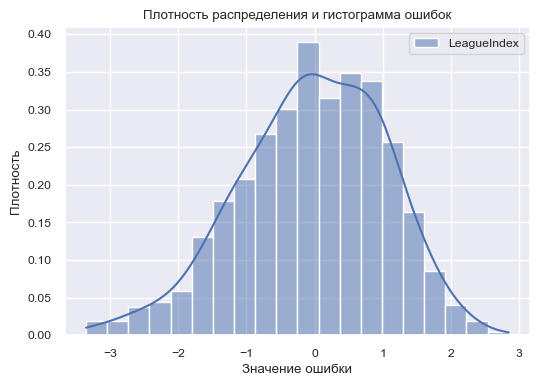

In [41]:
plt.figure(figsize=(6,4))

sns.histplot( data = y_test - y_predicted_on_ActionLatency,
              color="red",
              kde=True,
              stat="density",
            )

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

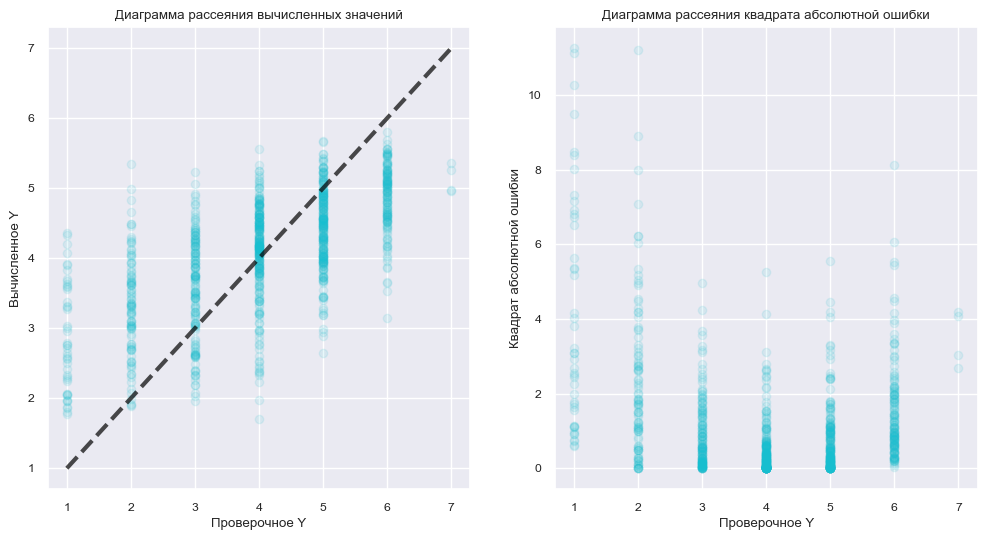

In [42]:
def PLOT34(y_test, y_pred) -> None:
    '''
    Функция построения графиков
    :param y_test: - проверочные значения целевой переменной
    :param y_pred: - вычисленные значения целевой переменной
    '''
    plt.figure(figsize=(12,6))

    # == Диаграмма рассеяния вычисленных значений ==
    # создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс текущего полотна в сетке
    plt.subplot(121)
    plt.scatter(y_test, y_pred,  alpha=0.1, color = "#17becf")
    plt.plot(  [ np.min(y_test), np.max(y_test) ], # x1,x2
               [ np.min(y_test), np.max(y_test) ], # y1,y2
               '--',
               alpha=0.7, lw=3, color = "black")
    plt.title('Диаграмма рассеяния вычисленных значений');
    plt.xlabel('Проверочное Y')
    plt.ylabel('Вычисленное Y')
    plt.grid(True)  # Сетка. Доп параметры color='black', linewidth=0.7

    # == Диаграмма рассеяния ошибок ==
    # создать второе полотно 121: 1-строк, 2-столбцов, 2-индекс текущего полотна в сетке
    plt.subplot(122)
    plt.scatter(y_test, (y_test - y_pred)**2,  alpha=0.1, color = "#17becf")
    plt.title('Диаграмма рассеяния квадрата абсолютной ошибки')
    plt.xlabel('Проверочное Y')
    plt.ylabel('Квадрат абсолютной ошибки')
    plt.grid(True)  # Сетка. Доп параметры color='black', linewidth=0.7
#--------------------------------------------------------------------------

PLOT34(
    y_test = y_test,
    y_pred = y_predicted_on_ActionLatency
)

In [43]:
print("Линейная регрессия. Признак 'ActionLatency'")
print("Формула линейной регрессии y(X) = k0*x0 + ... kN*xN + b")
print("y = f(X) = ")
coef = model_ActionLatency.coef_.flatten()

for i, kN in enumerate(coef):
    print(f" {' ' if i == 0 else '+'} {kN:.3f} * x{i}")
print(f" + {model_ActionLatency.intercept_[0]:.3f}")
print("\n")

'''
Вычисление и вывод метрик: MAE, RMSE, R2.
На основе сравнения проверочных и вычисленных.
'''
mae  = metrics.mean_absolute_error(y_test, y_predicted_on_ActionLatency)
mse  = metrics.mean_squared_error (y_test, y_predicted_on_ActionLatency)
rmse = np.sqrt(mse)
r2   = metrics.r2_score           (y_test, y_predicted_on_ActionLatency)
print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format( mae ))
print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse ))
print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse ))
print ("R2  : {:>9,.3f} (коэфф. детерминации)".format      ( r2 ))

Линейная регрессия. Признак 'ActionLatency'
Формула линейной регрессии y(X) = k0*x0 + ... kN*xN + b
y = f(X) = 
   -0.054 * x0
 + 7.498


MAE :     0.863 (средняя абсолютная ошибка)
MSE :  1.150525 (среднеквадратичная ошибка)
RMSE:  1.072625 (кв. корень из среднеквадратичной ошибки)
R2  :     0.417 (коэфф. детерминации)


## Многомерная модель от  НАБОРА#1 переменных

ActionLatency, APM, NumberOfPACs

In [44]:
feat3_1 = features[:3]  

model3_1 = linear_model.LinearRegression()
model3_1.fit(x_train[feat3_1], y_train)

y_pred = model3_1.predict(x_test[feat3_1])


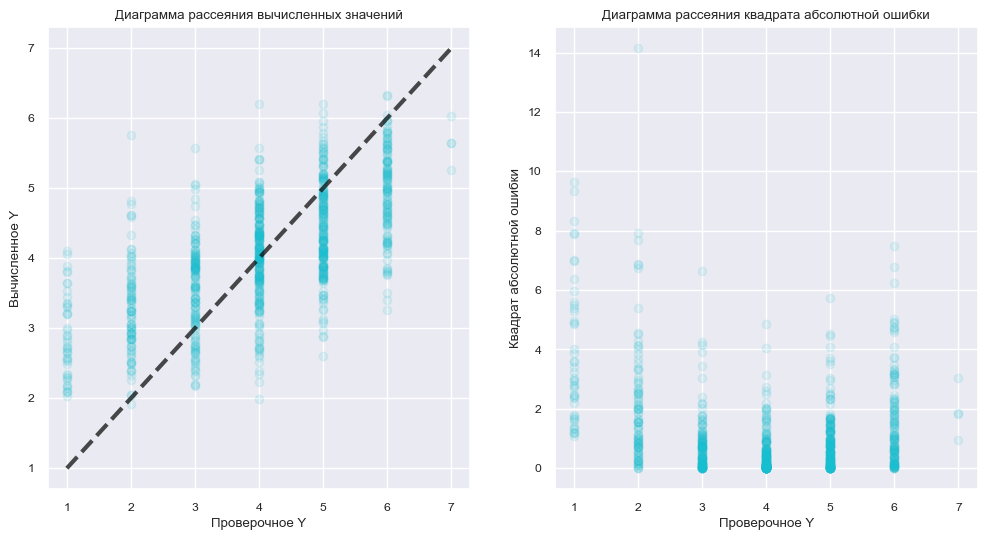

In [45]:
PLOT34(
    y_test = y_test,
    y_pred = y_pred
)

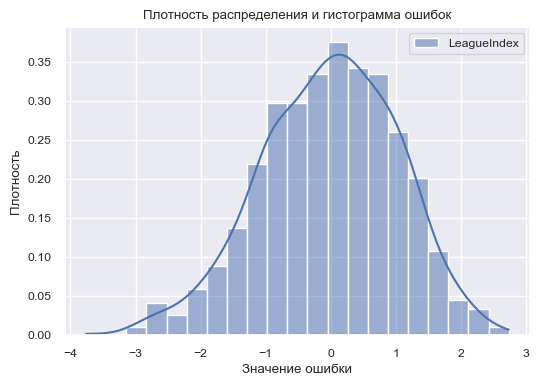

In [46]:
plt.figure(figsize=(6,4))

sns.histplot( data = y_test - y_pred,
              color="red",
              kde=True,
              stat="density",
            )

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

In [47]:
print("Линейная регрессия. Признаки 'ActionLatency', 'APM', 'NumberOfPACs'")
print("Формула линейной регрессии y(X) = k0*x0 + ... kN*xN + b")
print("y = f(X) = ")

coef = model3_1.coef_.flatten()

for i, kN in enumerate(coef):
    print(f" {' ' if i == 0 else '+'} {kN:.3f} * x{i}")
print(f" + {model3_1.intercept_[0]:.3f}")
print("\n")

'''
Вычисление и вывод метрик: MAE, RMSE, R2.
На основе сравнения проверочных и вычисленных.
'''
mae  = metrics.mean_absolute_error(y_test, y_pred)
mse  = metrics.mean_squared_error (y_test, y_pred)
rmse = np.sqrt(mse)
r2   = metrics.r2_score           (y_test, y_pred)
print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format( mae ))
print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse ))
print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse ))
print ("R2  : {:>9,.3f} (коэфф. детерминации)".format      ( r2 ))

Линейная регрессия. Признаки 'ActionLatency', 'APM', 'NumberOfPACs'
Формула линейной регрессии y(X) = k0*x0 + ... kN*xN + b
y = f(X) = 
   -0.027 * x0
 + 0.010 * x1
 + 171.226 * x2
 + 4.073


MAE :     0.845 (средняя абсолютная ошибка)
MSE :  1.102522 (среднеквадратичная ошибка)
RMSE:  1.050011 (кв. корень из среднеквадратичной ошибки)
R2  :     0.442 (коэфф. детерминации)


## Многомерная модель от  НАБОРА#2 переменных

AssignToHotkeys, SelectByHotkeys, UniqueHotkeys

In [48]:
feat3_2 = features[3:]  

model3_2 = linear_model.LinearRegression()
model3_2.fit(x_train[feat3_2], y_train)

y_pred = model3_2.predict(x_test[feat3_2])

In [49]:
print("Линейная регрессия. Признаки AssignToHotkeys, SelectByHotkeys, UniqueHotkeys")
print("Формула линейной регрессии y(X) = k0*x0 + ... kN*xN + b")
print("y = f(X) = ")

# Преобразуем coef_ в одномерный массив, если он двумерный
coef = model3_2.coef_.flatten()  # Преобразуем в одномерный массив

for i, kN in enumerate(coef):
    print(f" {' ' if i == 0 else '+'} {kN:.3f} * x{i}")
print(f" + {model3_2.intercept_[0]:.3f}")
print("\n")

mae  = metrics.mean_absolute_error(y_test, y_pred)
mse  = metrics.mean_squared_error (y_test, y_pred)
rmse = np.sqrt(mse)
r2   = metrics.r2_score           (y_test, y_pred)
print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format( mae ))
print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse ))
print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse ))
print ("R2  : {:>9,.3f} (коэфф. детерминации)".format      ( r2 ))

Линейная регрессия. Признаки AssignToHotkeys, SelectByHotkeys, UniqueHotkeys
Формула линейной регрессии y(X) = k0*x0 + ... kN*xN + b
y = f(X) = 
   1832.211 * x0
 + 174.033 * x1
 + 0.055 * x2
 + 2.664


MAE :     0.977 (средняя абсолютная ошибка)
MSE :  1.469585 (среднеквадратичная ошибка)
RMSE:  1.212264 (кв. корень из среднеквадратичной ошибки)
R2  :     0.256 (коэфф. детерминации)


## Многомерная модель от  НАБОРА#3 переменных 

ActionLatency, APM, NumberOfPACs,  AssignToHotkeys, SelectByHotkeys, UniqueHotkeys

In [50]:
model6 = linear_model.LinearRegression()
model6.fit(x_train, y_train)

y_pred = model6.predict(x_test)

In [51]:
print("Линейная регрессия. Признаки 'ActionLatency', 'APM', 'NumberOfPACs', 'AssignToHotkeys', 'SelectByHotkeys', 'UniqueHotkeys'")
print("Формула линейной регрессии y(X) = k0*x0 + ... kN*xN + b")
print("y = f(X) = ")

coef = model6.coef_.flatten()  

for i, kN in enumerate(coef):
    print(f" {' ' if i == 0 else '+'} {kN:.3f} * x{i}")
print(f" + {model6.intercept_[0]:.3f}")
print("\n")

mae  = metrics.mean_absolute_error(y_test, y_pred)
mse  = metrics.mean_squared_error (y_test, y_pred)
rmse = np.sqrt(mse)
r2   = metrics.r2_score           (y_test, y_pred)
print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format( mae ))
print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse ))
print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse ))
print ("R2  : {:>9,.3f} (коэфф. детерминации)".format      ( r2 ))

Линейная регрессия. Признаки 'ActionLatency', 'APM', 'NumberOfPACs', 'AssignToHotkeys', 'SelectByHotkeys', 'UniqueHotkeys'
Формула линейной регрессии y(X) = k0*x0 + ... kN*xN + b
y = f(X) = 
   -0.030 * x0
 + 0.005 * x1
 + 80.006 * x2
 + 1166.798 * x3
 + 35.445 * x4
 + 0.026 * x5
 + 4.525


MAE :     0.828 (средняя абсолютная ошибка)
MSE :  1.064465 (среднеквадратичная ошибка)
RMSE:  1.031729 (кв. корень из среднеквадратичной ошибки)
R2  :     0.461 (коэфф. детерминации)


## Логистическая регрессия

ActionLatency, APM, NumberOfPACs,  AssignToHotkeys, SelectByHotkeys, UniqueHotkeys

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Масштабирование признаков
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.values)
x_test_scaled = scaler.transform(x_test.values)

logreg = LogisticRegression(multi_class='multinomial')
logreg.fit(x_train_scaled, y_train)

# Предсказание и метрики
y_pred_all = logreg.predict(x_test_scaled)
acc = accuracy_score(y_test, y_pred_all)
rep = classification_report(y_test, y_pred_all)

print(f"Accuracy: {acc:.4f}")
print('\nClassification report:\n', rep)

Accuracy: 0.3779

Classification report:
               precision    recall  f1-score   support

         1.0       0.43      0.07      0.12        45
         2.0       0.35      0.28      0.31        96
         3.0       0.30      0.22      0.25       142
         4.0       0.34      0.50      0.40       232
         5.0       0.39      0.47      0.43       216
         6.0       0.58      0.38      0.46       133
         7.0       0.00      0.00      0.00         4

    accuracy                           0.38       868
   macro avg       0.34      0.27      0.28       868
weighted avg       0.39      0.38      0.37       868



d:\conda\envs\IS\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\conda\envs\IS\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\conda\envs\IS\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\conda\envs\IS\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 

# Итоги. Сравнение полученных моделей

Укажите основные численные значения полученные в вашей работе:
- Размеры таблиц данных на этапах:
  - исходная таблица при загрузке csv-файла = Строк x Столбцов
  - после исключения пропущенных значений = Строк x Столбцов
  - после исключения выбросов = Строк x Столбцов

- Исходная таблица: 3395 строк х 20 столбцов
- После исключения пропущенных значений: 3289 строк х 20 столбцов
- После исключения выбросов: 2893 строк х 6 столбцов

Приведите все численные оценки всех моделей для более удобного сравнения. Пример:

      M1. Линейная одномерная регрессия. Признаки: 'ActionLatency'.
        Формула линейной регресси y(x) = k0*x0 + ... kN*xN + b
        MAE : 0.861 (средняя абсолютная ошибка)
        MSE : 1.151 (среднеквадратичная ошибка)
        RMSE: 1.073 (кв. корень из среднеквадратичной ошибки)
        R2  : 0.417 (коэфф. детерминации)

      M2. Линейная многомерная регрессия. Признаки: 'ActionLatency', 'APM', 'NumberOfPACs'.
        Формула линейной регресси y(x) = k0*x0 + ... kN*xN + b
        MAE : 0.845 (средняя абсолютная ошибка)
        MSE : 1.1025 (среднеквадратичная ошибка)
        RMSE: 1.05  (кв. корень из среднеквадратичной ошибки)
        R2  : 0.442(коэфф. детерминации)
      
      M3. Линейная многомерная регрессия. Признаки: 'AssignToHotkeys', 'SelectByHotkeys', 'UniqueHotkeys'.
        Формула линейной регресси y(x) = k0*x0 + ... kN*xN + b
        MAE : 0.977 (средняя абсолютная ошибка)
        MSE : 1.469 (среднеквадратичная ошибка)
        RMSE: 1.212  (кв. корень из среднеквадратичной ошибки)
        R2  : 0.256 (коэфф. детерминации)

      M4. Линейная многомерная регрессия. Признаки: 'ActionLatency', 'APM', 'NumberOfPACs',  'AssignToHotkeys', 'SelectByHotkeys', 'UniqueHotkeys'.
        Формула линейной регресси y(x) = k0*x0 + ... kN*xN + b
        MAE : 0.828 (средняя абсолютная ошибка)
        MSE : 1.064 (среднеквадратичная ошибка)
        RMSE: 1.031  (кв. корень из среднеквадратичной ошибки)
        R2  : 0.461 (коэфф. детерминации)


Оцените в минутах время затраченное на выполнение основных этапов текущей работы, согласно методологии CRISP, затем заполните эту информацию в следующей ячейке для получения столбчатой диаграммы.

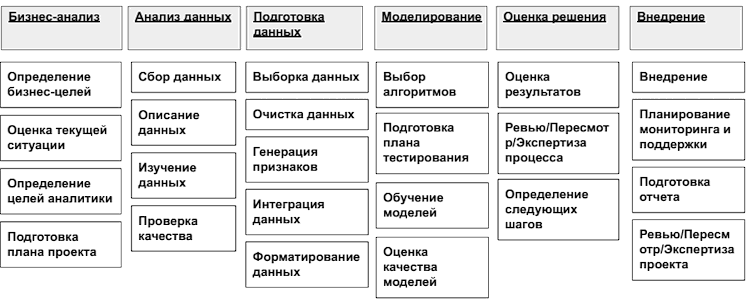

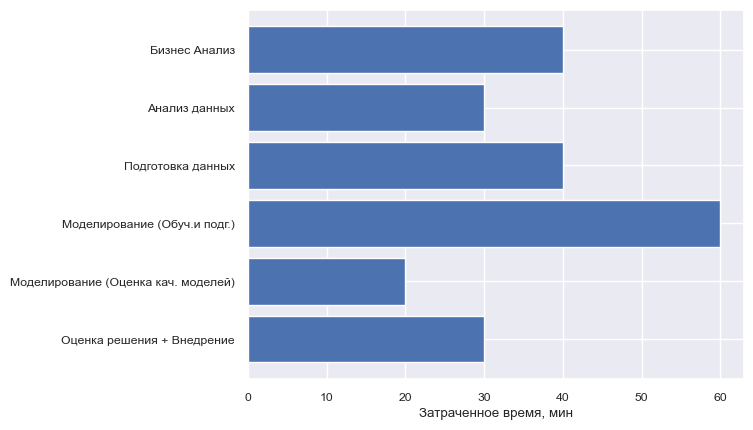

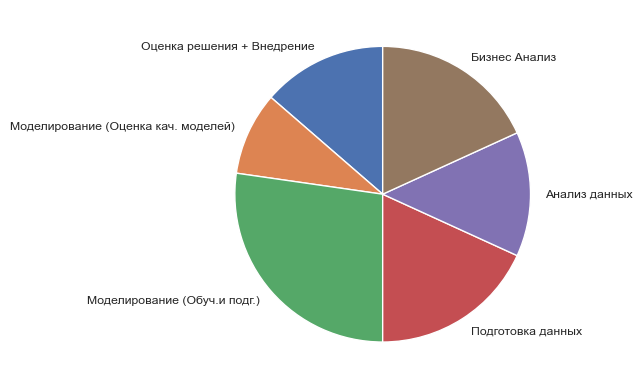

In [53]:
# Создадим датафрейм для хранения значений
dfSpendTimeLab1 = pd.DataFrame.from_dict(
{
  "1": {"step": "Бизнес Анализ",                       "duration, min" : 40 },
  "2": {"step": "Анализ данных",                       "duration, min" : 30 },
  "3": {"step": "Подготовка данных",                   "duration, min" : 40 },
  "4": {"step": "Моделирование (Обуч.и подг.)",        "duration, min" : 60 },
  "5": {"step": "Моделирование (Оценка кач. моделей)", "duration, min" : 20 },
  "6": {"step": "Оценка решения + Внедрение",          "duration, min" : 30 },
}
, orient="index"
).sort_index(ascending=False)

# Построить столбчатую диаграмму
fig = plt.figure()
plt.barh(y = dfSpendTimeLab1["step"], width= dfSpendTimeLab1["duration, min"], )
plt.xlabel("Затраченное время, мин")

# Построить круговую диаграмму
fig = plt.figure()
plt.pie(x= dfSpendTimeLab1["duration, min"], labels=dfSpendTimeLab1["step"],  startangle = 90 )

plt.show()

# Выводы по работе

...

Сравните модели между собой по метрике точности R2:
1. какая из полученных моделей имеет макс. значение метрики R2?
- Максимальным значением метрики R2 обладает модель, которая использует все отобранные признаки ('ActionLatency', 'APM', 'NumberOfPACs', 'AssignToHotkeys', 'SelectByHotkeys', 'UniqueHotkeys').

2. во сколько раз метрики R2 отличаются между моделями?
- Относительно худшего результата метрики отличаются в 2 раза. Между лучшими вариантами отличие около 1.05 раза.

3. какие из выбранных признаков X являются необходимыми для увеличения R2?
- Необходимыми оказались признаки 'ActionLatency', 'APM', 'NumberOfPACs', 'AssignToHotkeys', 'SelectByHotkeys', 'UniqueHotkeys' (все рассматриваемые).

4. как изменяется метрика R2 при дополнении одниз признаков X другими?
- Метрика изменяется по разному. При добавлении к признакам 'AssignToHotkeys', 'SelectByHotkeys', 'UniqueHotkeys' остальных 3-х рассматриваемых признаков для обучения модели метрика R2 увеличилась в 2 раза. Но при добавлении к признаку 'ActionLatency' признаков 'APM', 'NumberOfPACs', метрика R2 увиличлась всего в 1.05 раза.